<a href="https://colab.research.google.com/github/RealMyeong/Aiffel_Exploration/blob/main/EX_BS2_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 전처리

In [124]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' #고화질로 나타내줌
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore") #경고문 안나오게 해줌

import os
from os.path import join


In [125]:
data_path = '/content/drive/MyDrive/캐글_필사/data_집값'
train_data_path = join(data_path, 'train.csv')
test_data_path = join(data_path, 'test.csv')

In [126]:
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [127]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [128]:
test.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [129]:
train.shape, test.shape

((15035, 21), (6468, 20))

In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

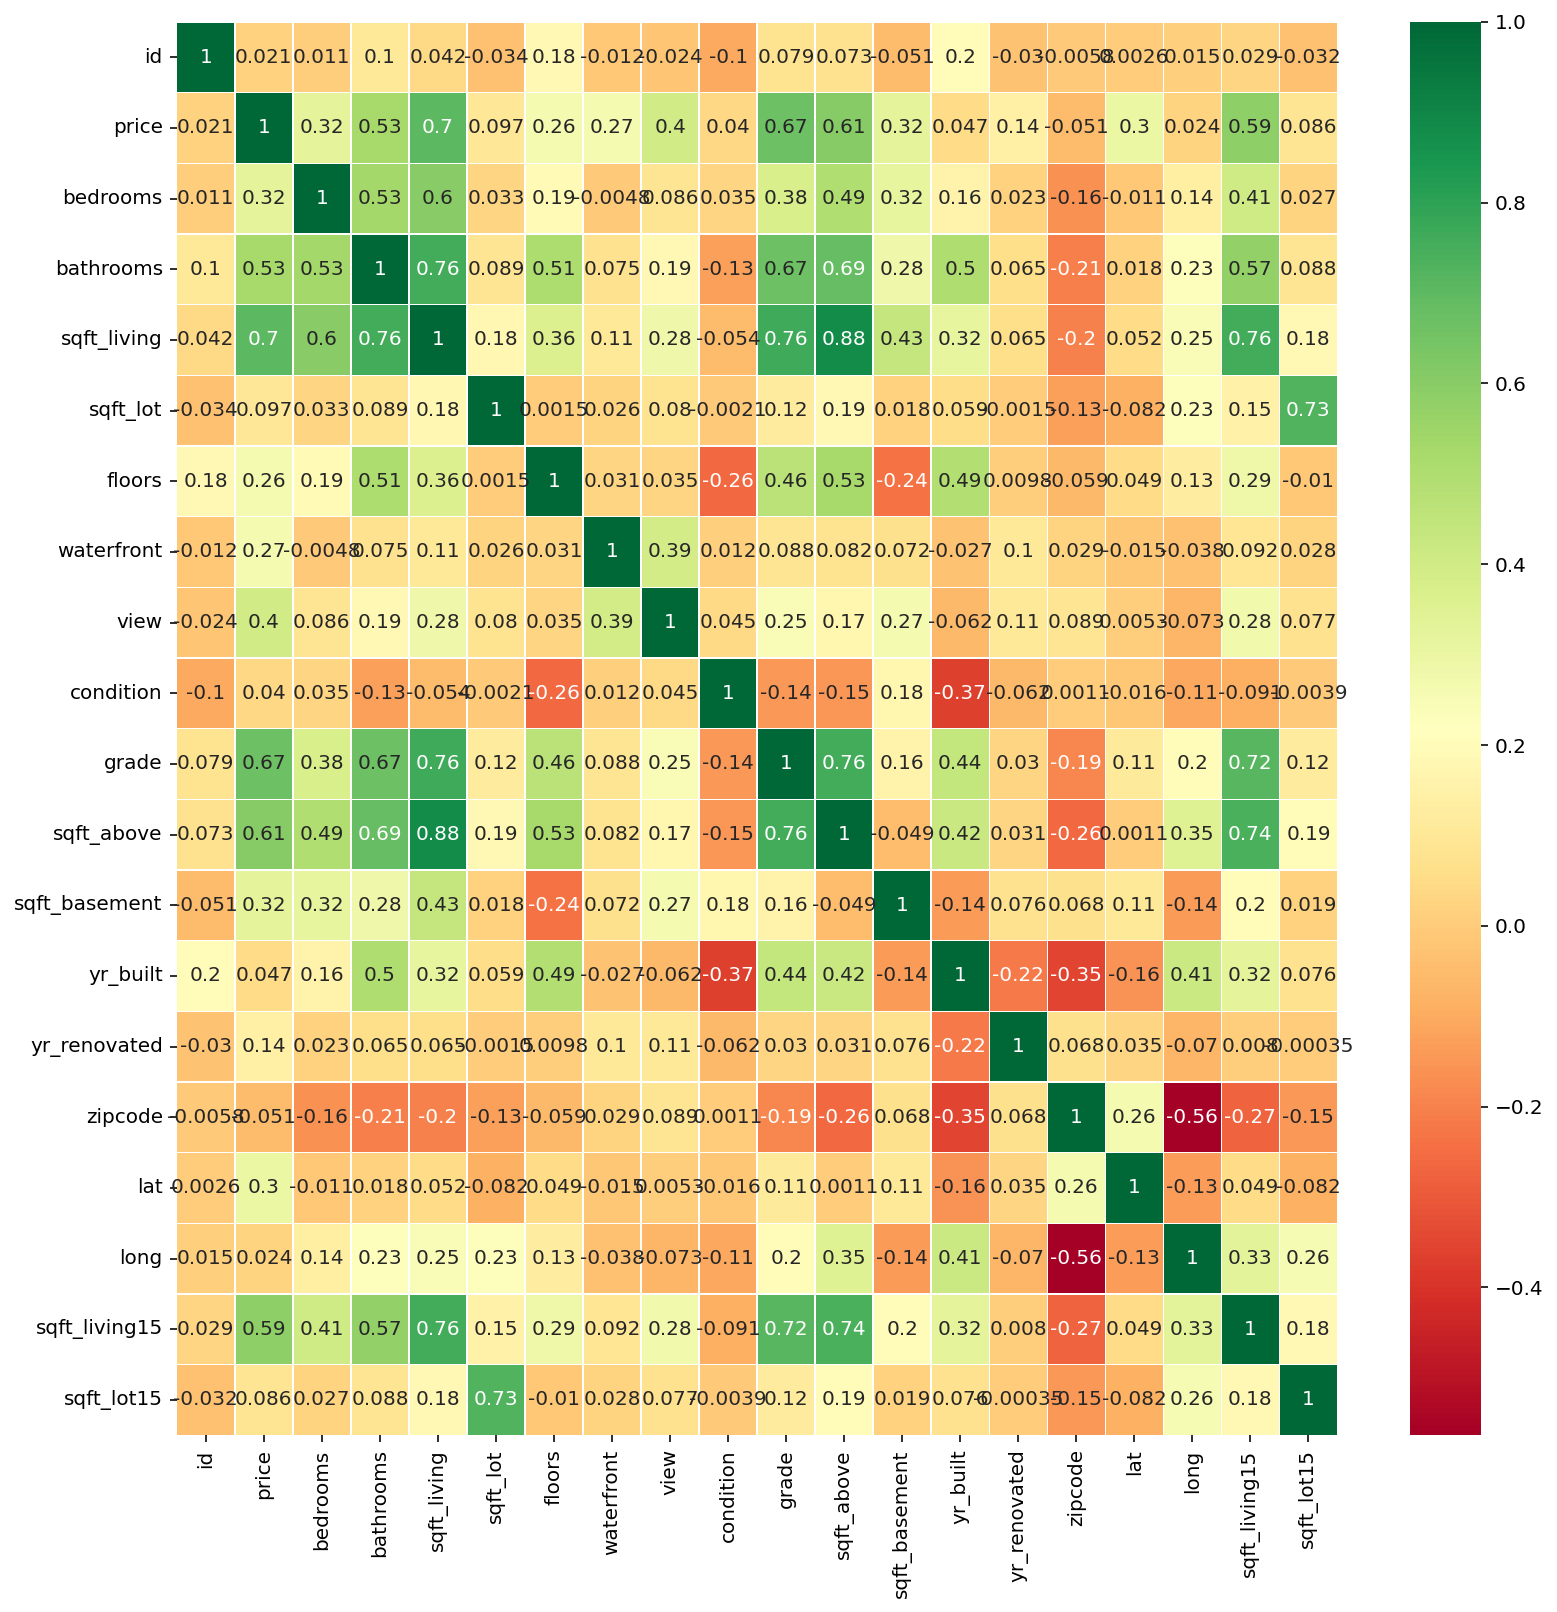

In [131]:
sns.heatmap(train.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) # data.corr() --> correlation matrix
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.show()

- price와 sqft_living15, sqft_above, grade, sqft_living, bathrooms가 비교적 큰 상관관계를 보이는 것을 알 수 있다

- 테스트와 데이터 합치고 타겟값인 price를 y로 저장 




In [132]:
train_len = len(train)
test_len = len(test)
y = train['price']
train = train.drop('price', axis=1)
all_data = pd.concat((train, test), axis=0)

In [133]:
all_data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


- 컬럼별 결측치 확인하기

In [134]:
for c in all_data.columns:
    print('{} : {}'.format(c, len(all_data.loc[pd.isnull(all_data[c]), c].values)))

id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


- 결측치를 missing no를 이용해 시각적으로 확인

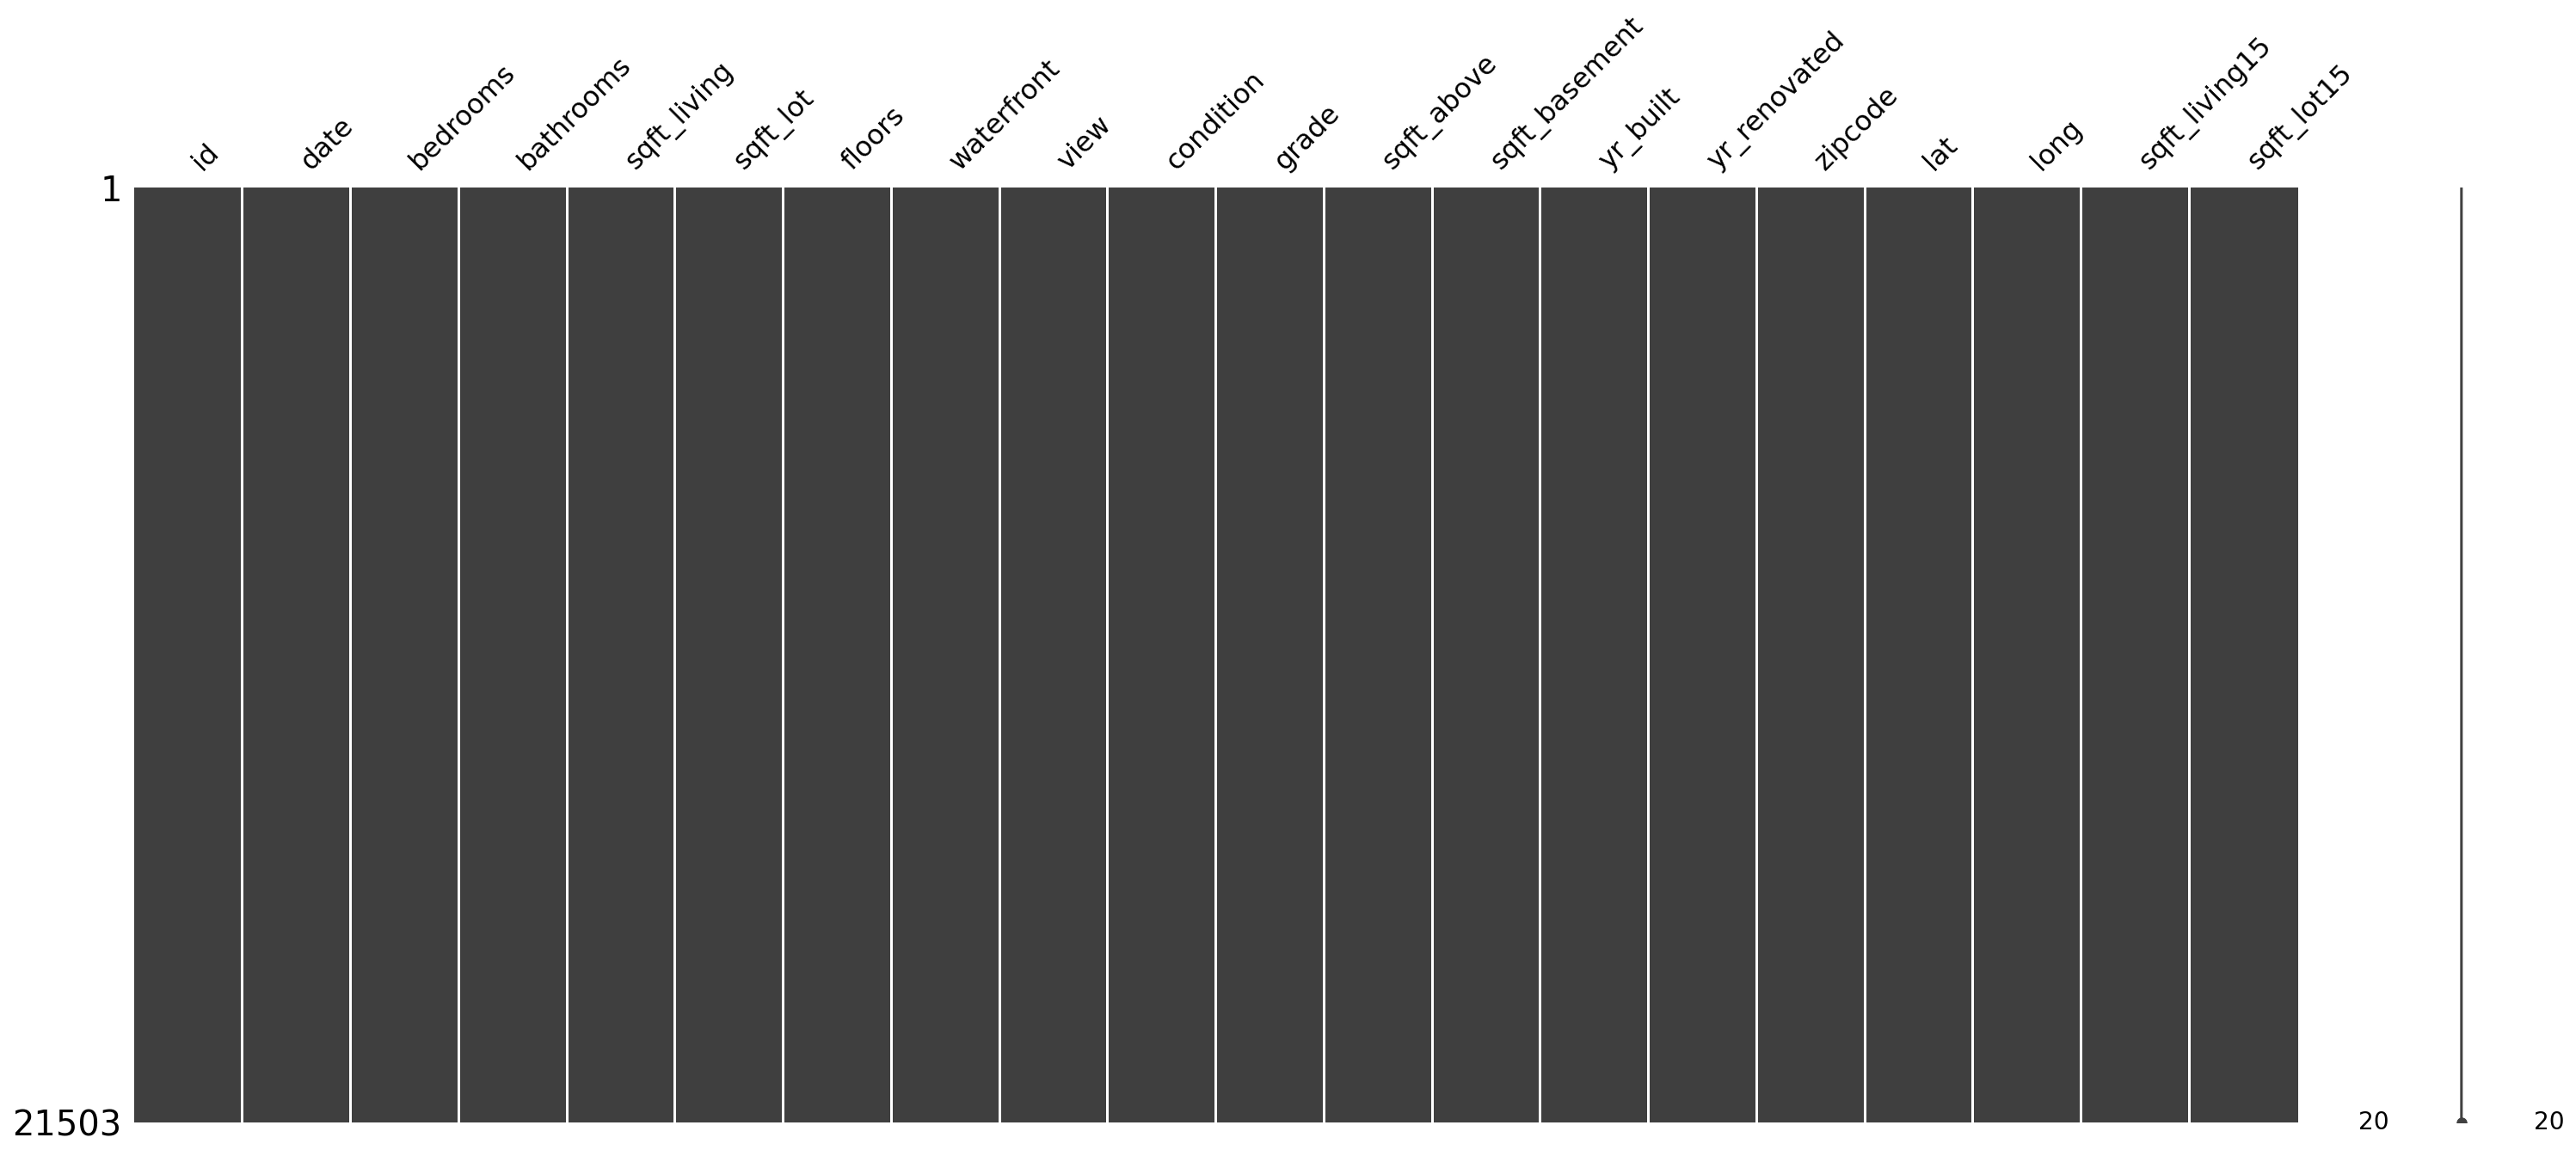

In [135]:
msno.matrix(all_data)

- date 컬럼의 자료들을 년,월,일 로만 나타내고 정수형으로 변환

In [136]:
all_data['date'] = all_data['date'].apply(lambda x : int(x[:6]))

In [137]:
all_data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [138]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 6467
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21503 non-null  int64  
 1   date           21503 non-null  int64  
 2   bedrooms       21503 non-null  int64  
 3   bathrooms      21503 non-null  float64
 4   sqft_living    21503 non-null  int64  
 5   sqft_lot       21503 non-null  int64  
 6   floors         21503 non-null  float64
 7   waterfront     21503 non-null  int64  
 8   view           21503 non-null  int64  
 9   condition      21503 non-null  int64  
 10  grade          21503 non-null  int64  
 11  sqft_above     21503 non-null  int64  
 12  sqft_basement  21503 non-null  int64  
 13  yr_built       21503 non-null  int64  
 14  yr_renovated   21503 non-null  int64  
 15  zipcode        21503 non-null  int64  
 16  lat            21503 non-null  float64
 17  long           21503 non-null  float64
 18  sqft_li

In [139]:
sub_id = all_data['id'][train_len : ]
all_data = all_data.drop('id', axis=1)

- 각 column별 자료들의 분포를 시각적으로 확인

- sns.kdeplot을 사용

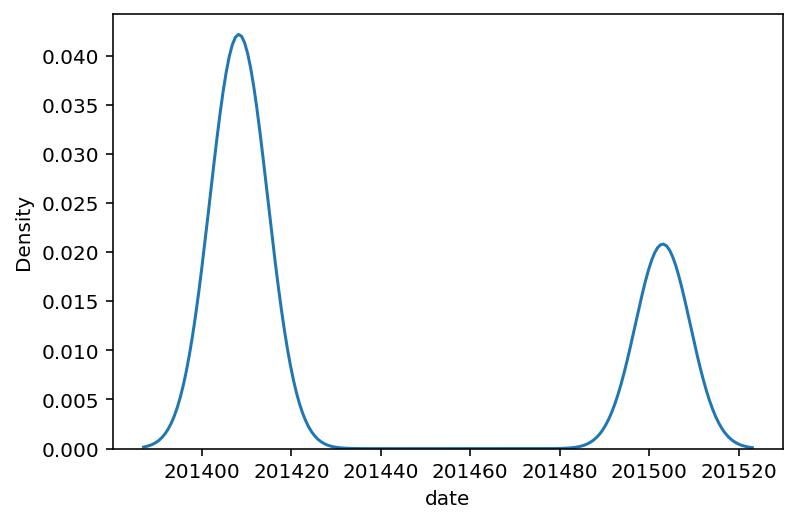

In [140]:
sns.kdeplot(data = all_data['date']) #date에 대해서만 kdeplot 그리기

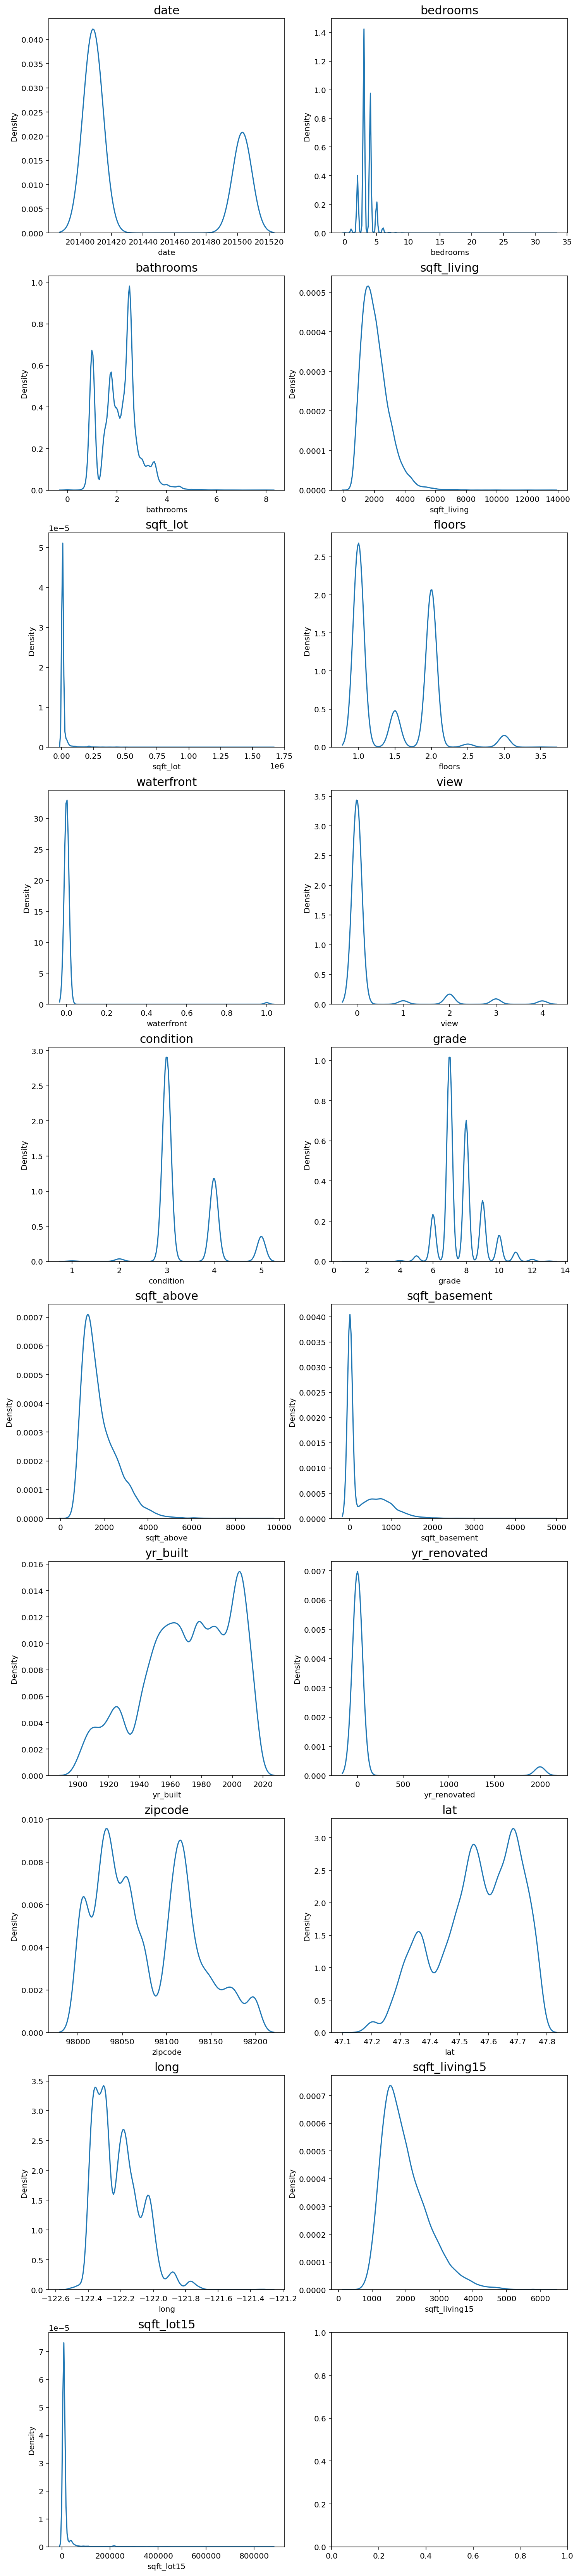

In [141]:
f, ax = plt.subplots(10, 2, figsize = (12,60))

col_index = 0
col = all_data.columns
for i in range(10): #for 반복문 이용해서 전체 그리기
  for j in range(2):
    sns.kdeplot(data=all_data[col[col_index]], ax=ax[i,j])
    ax[i,j].set_title(col[col_index], fontsize = 15)
    col_index += 1
    if col_index == 19:
      break


- 한쪽으로 너무 치우친 데이터들을 log를 사용해 정규분포에 가깝게 만들어줌

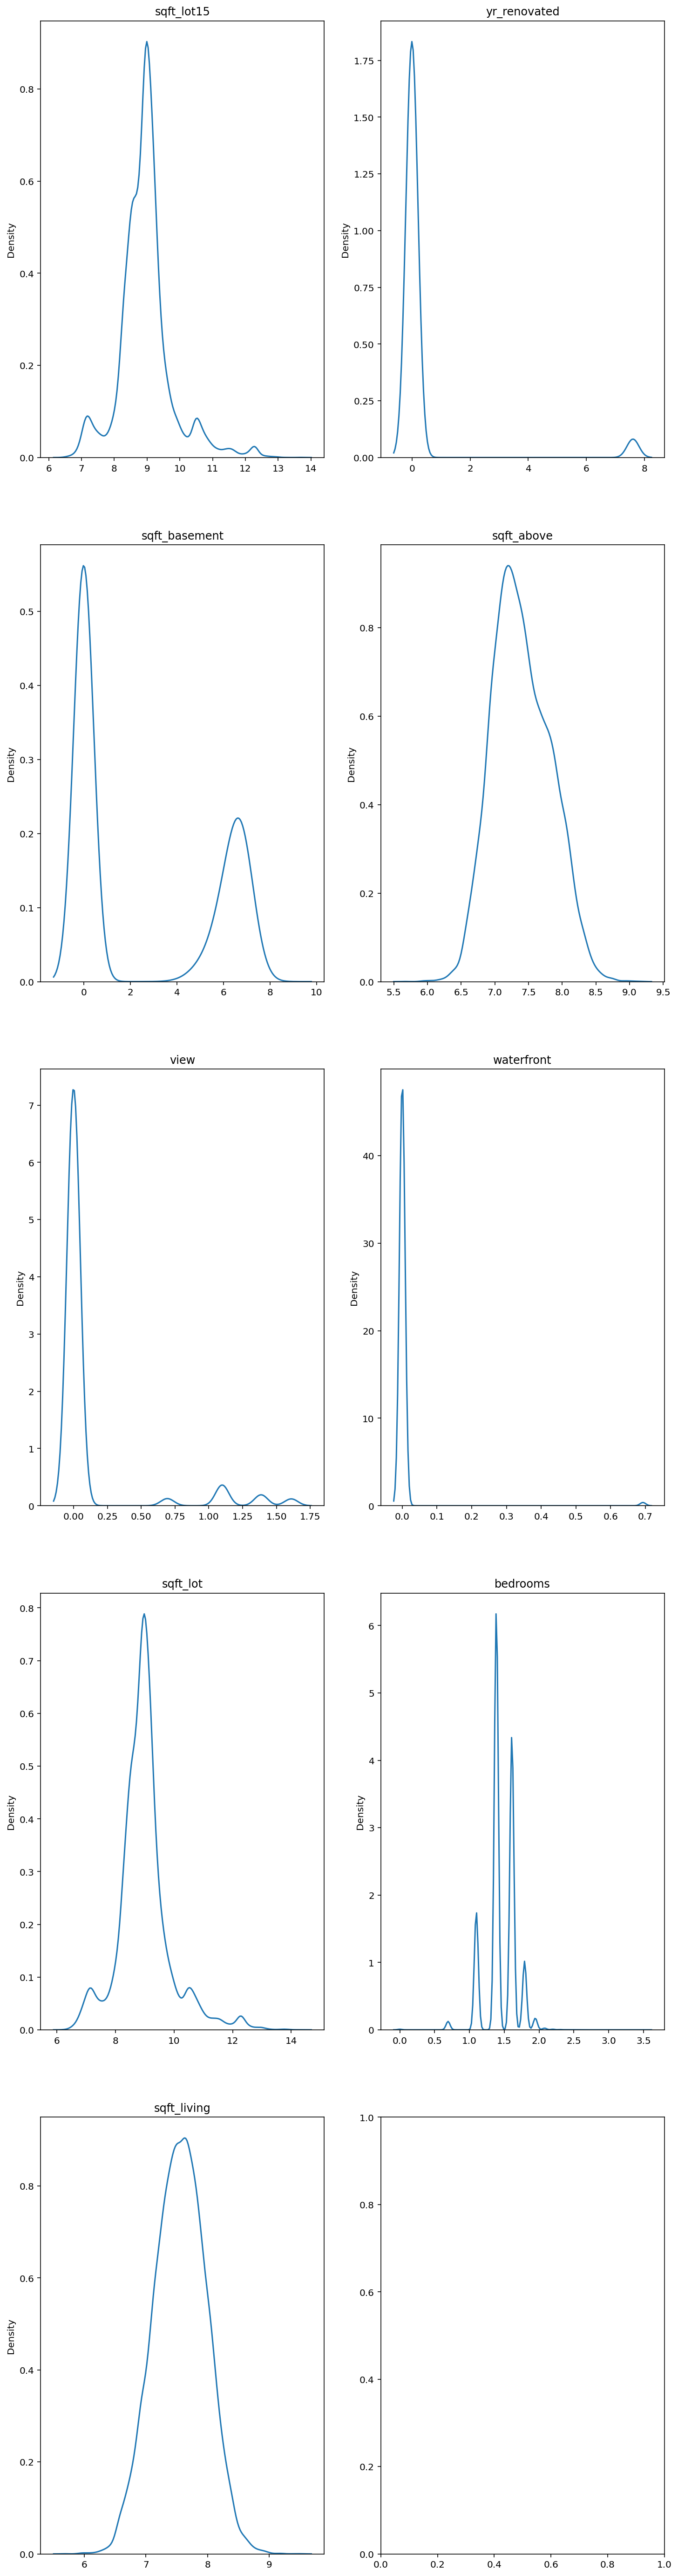

In [142]:
skew_columns = ['sqft_lot15', 'yr_renovated', 'sqft_basement', 'sqft_above', 'view', 'waterfront', 'sqft_lot', 'bedrooms', 'sqft_living']

f, ax = plt.subplots(5, 2, figsize = (12,50))
col_index = 0
for i in range(5):
  for j in range(2):
    sns.kdeplot(data=np.log1p(all_data[skew_columns[col_index]].values), ax=ax[i,j])
    ax[i,j].set_title(skew_columns[col_index])
    col_index += 1
    if col_index == 9:
      break

In [143]:
all_data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


# 모델 학습

- all_data를 train, test 데이터로 분리

In [144]:
predict_x = all_data.iloc[train_len:, :]
x = all_data.iloc[:train_len, :]

In [145]:
x.shape, predict_x.shape, y.shape

((15035, 19), (6468, 19), (15035,))

In [146]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

In [147]:
gboost = GradientBoostingRegressor(random_state=20)
xgboost = xgb.XGBRegressor(random_state=20, objective = 'reg:squarederror')
lightgbm = lgb.LGBMRegressor(random_state=20)

models = [{'model' : gboost, 'name' : 'GradientBoosting'},
          {'model' : xgboost, 'name':'XGBoost'}, 
          {'model' : lightgbm, 'name' : 'LightGBM'}]
  

- Cross Validation

In [148]:
def get_cv_score(models):
  kfold = KFold(n_splits=5).get_n_splits(x.values)
  for m in models:
    CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
    print(f"Model: {m['name']}, CV score: {CV_score:.4f}")

In [149]:
get_cv_score(models)

Model: GradientBoosting, CV score: 0.8606
Model: XGBoost, CV score: 0.8624
Model: LightGBM, CV score: 0.8818


- Average blending

In [150]:
def AveragingBlending(models, x, y, predict_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(predict_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

In [151]:
y_pred = AveragingBlending(models, x, y, predict_x)
print(len(y_pred))
y_pred

6468


array([ 562566.39221578,  389660.68147617, 1340643.45409443, ...,
        438058.69137012,  345498.01852609,  414241.23776683])

# 성능 향상

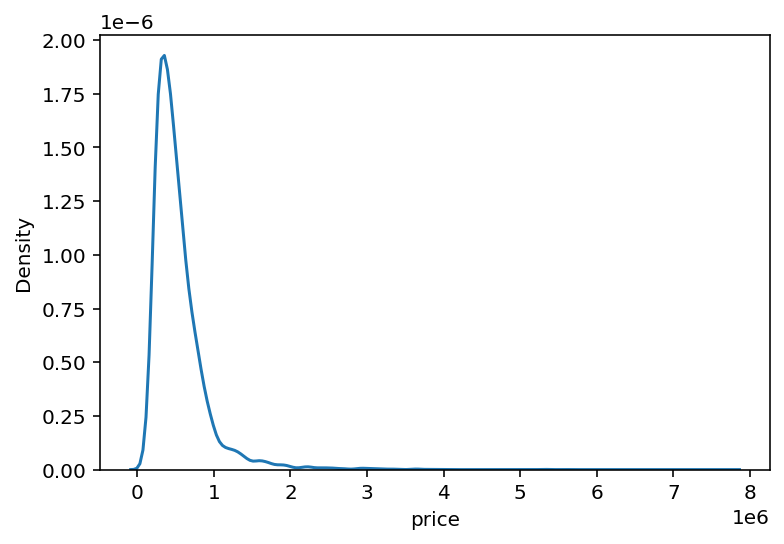

In [152]:
sns.kdeplot(y)

- 그래프가 편향 되어있어서 log를 씌워주고 나중에 다시 exp로 되돌려준다

In [153]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

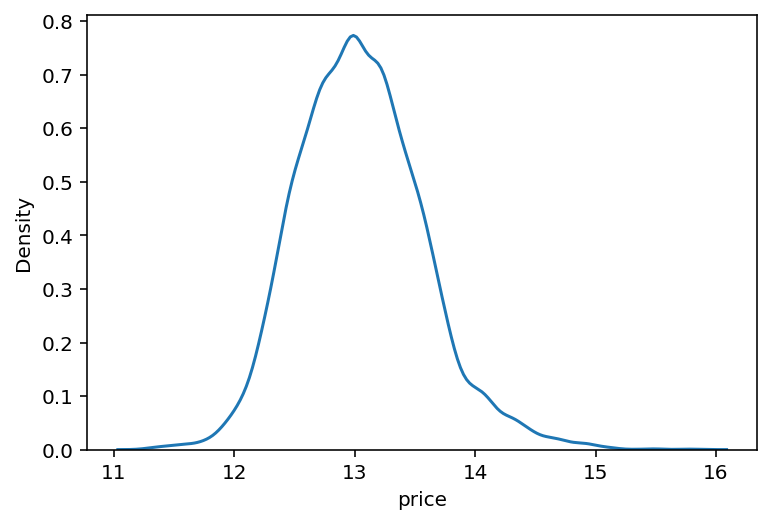

In [154]:
sns.kdeplot(y)

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [156]:
#rmse 함수 정의
def rmse(y_test, y_pred):
  rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
  return rmse

In [157]:
#필요한 모델들 가져옴
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [158]:
#모델 설정

gboost_model = GradientBoostingRegressor(random_state=20)
xgboost_model = XGBRegressor(random_state=20, objective = 'reg:squarederror')
lightgbm_model = LGBMRegressor(random_state=20)
rdforest_model = RandomForestRegressor(random_state=20)

models = [gboost_model, xgboost_model, lightgbm_model, rdforest_model]

In [159]:
#각 모델에 대한 rmse점수를 출력하는 함수 정의

def get_scores(models, x, y):
    df = {}
    for model in models :
        #모델의 이름을 가져오는 함수
        model_name = model.__class__.__name__  
        # data를 train_test_split을 이용해 분리
        X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=20, test_size=0.2)
        #모델에 데이터 피팅(train)
        model.fit(X_train, y_train)
        #X_test에 대한 예측값 
        y_pred = model.predict(X_test)
        #각 모델별로 모델 이름과 rmse값을 df딕셔너리에 추가
        df[model_name] = rmse(y_test, y_pred)
        #
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    return score_df


In [160]:
get_scores(models, x, y)

,RMSE
XGBRegressor,167197.125782
GradientBoostingRegressor,167139.353478
RandomForestRegressor,146772.151912
LGBMRegressor,144739.234054


# 하이퍼 파라미터 튜닝

- Greed Search CV

In [161]:
from sklearn.model_selection import GridSearchCV

In [188]:
param_grid = {'n_estimators': [300],
    'max_depth': [25]
    }

## LGBM

In [163]:
#모델 준비
model = LGBMRegressor(random_state=20)


In [164]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, 
                              param_grid=param_grid, 
                              scoring = 'neg_mean_squared_error', 
                              cv = 5, 
                              verbose = verbose, 
                              n_jobs = n_jobs )
    grid_model.fit(train, y)
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    df = pd.DataFrame(params)
    df['score'] = score

    df['RMSLE'] = np.sqrt(-1 * df['score'])
    df = df.sort_values('RMSLE')

    return df

In [189]:
my_GridSearch(model, x, y, param_grid)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


,max_depth,n_estimators,score,RMSLE
0,25,300,-0.026091,0.161527


- max_depth : 20, n_estimators : 300 일  때 가장 좋음

In [187]:
# test 데이터에 대해 예측값
lgbm_model = LGBMRegressor(max_depth=25, n_estimators=300, random_state=20)
lgbm_model.fit(x, y)
lgbm_pred = np.expm1(lgbm_model.predict(predict_x)) #위에서 np.log1p() 해줬기 때문에 다시 np.expm1()로 되돌려 줘야함
lgbm_pred

array([ 499619.74521686,  490052.17258291, 1397838.90879818, ...,
        465269.55869982,  318564.30877008,  450157.90324192])

In [167]:
submission_path = join(data_path, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission['price'] = lgbm_pred
submission.head()

,id,price
0,15035,4.996197e+05
1,15036,4.900522e+05
2,15037,1.397839e+06
3,15038,3.072446e+05
4,15039,3.279127e+05


In [168]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_path, 'lgbm', '0.161640')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/content/drive/MyDrive/캐글_필사/data_집값/submission_lgbm_RMSLE_0.161640.csv


## XGBoost 모델 하이퍼파라미터 튜닝

In [169]:
param_grid2 = {'n_estimators': [200],
    'max_depth': [10],
    'learning_rate' : [0.1]
    }

model_xgb = xgb.XGBRegressor(random_state=20, objective='reg:squarederror')


In [170]:
def my_GridSearch2(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, 
                              param_grid=param_grid, 
                              scoring = 'neg_mean_squared_error', 
                              cv = 5, 
                              verbose = verbose, 
                              n_jobs = n_jobs )
    grid_model.fit(train, y)
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    df = pd.DataFrame(params)
    df['score'] = score

    df['RMSLE'] = np.sqrt(-1 * df['score'])
    df = df.sort_values('RMSLE')

    return df

In [171]:
my_GridSearch(model_xgb, x, y, param_grid2)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


,learning_rate,max_depth,n_estimators,score,RMSLE
0,0.1,10,200,-0.026859,0.163887


In [172]:

xgb_model = xgb.XGBRegressor(random_state=20, learning_rate = 0.1, max_depth=10, n_estimators=200, objective='reg:squarederror')
xgb_model.fit(x, y)
xgb_pred = np.expm1(xgb_model.predict(predict_x))
xgb_pred


array([ 518555.34,  401180.12, 1255738.  , ...,  480947.34,  344189.3 ,
        445271.66], dtype=float32)

In [173]:
submission_path = join(data_path, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission['price'] = y_pred
submission.head()

,id,price
0,15035,5.625664e+05
1,15036,3.896607e+05
2,15037,1.340643e+06
3,15038,3.317573e+05
4,15039,2.966855e+05


In [174]:
submission_csv_path = '{}/submission_{}_rmsle_{}.csv'.format(data_path, 'xgboost', '0.163887')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/content/drive/MyDrive/캐글_필사/data_집값/submission_xgboost_rmsle_0.163887.csv


## 엘라스틱넷 

In [175]:
from sklearn.linear_model import ElasticNet
elastic_params = {'alpha' : [0.001],
                  'max_iter' : [4000]}

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, 
                              param_grid=param_grid, 
                              scoring = 'neg_mean_squared_error', 
                              cv = 5, 
                              verbose = verbose, 
                              n_jobs = n_jobs )
    grid_model.fit(train, y)
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    df = pd.DataFrame(params)
    df['score'] = score

    df['RMSLE'] = np.sqrt(-1 * df['score'])
    df = df.sort_values('RMSLE')

    return df



In [176]:
ela_model = ElasticNet(random_state=42)

my_GridSearch(ela_model, x, y, elastic_params)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


,alpha,max_iter,score,RMSLE
0,0.001,4000,-0.063797,0.252581


In [177]:
ela_model = ElasticNet(random_state=20, alpha = 0.001, max_iter = 4000)
ela_model.fit(x, y)
elastic_pred = np.expm1(ela_model.predict(predict_x))

## 랜덤 포레스트

In [178]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=20)


In [179]:
rf_params = {'n_estimators':[400],
             'max_depth' : [20]}


In [180]:
my_GridSearch(rf_model, x, y, rf_params)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


,max_depth,n_estimators,score,RMSLE
0,15,400,-0.031765,0.178228


In [182]:
rf_model = RandomForestRegressor(random_state=20, n_estimators = 400, max_depth = 15)
rf_model.fit(x, y)
rf_pred = np.expm1(rf_model.predict(predict_x))

## Weighted blending

In [183]:
final_outputs = {'randomforest': rf_pred,
    'xgboost': xgb_pred,
    'lgbm': lgbm_pred,
    'elasticnet' : elastic_pred
    }

In [184]:
final_prediction=(final_outputs['randomforest'] * 0.2
                  + final_outputs['xgboost'] * 0.3
                  + final_outputs['lgbm'] * 0.4
                  + final_outputs['elasticnet'] * 0.1)

final_prediction

array([ 511816.29298094,  455650.412546  , 1380553.27859455, ...,
        461618.97239908,  323813.72590185,  440920.84024447])

In [185]:
submission_path = join(data_path, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission['price'] = final_prediction
submission.head()

,id,price
0,15035,5.118163e+05
1,15036,4.556504e+05
2,15037,1.380553e+06
3,15038,3.123960e+05
4,15039,3.272746e+05


In [186]:
submission_csv_path = '{}/submission_{}_rmsle.csv'.format(data_path, 'blending')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/content/drive/MyDrive/캐글_필사/data_집값/submission_blending_rmsle.csv
